In [1]:
import numpy as np 
import pickle
from scipy.sparse import lil_matrix, csr_matrix
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
co_occurrence_matrix = pickle.load(open("..\co_occurrence_matrices\co_occurrence_matrix_window_5.pkl", "rb"))

In [ ]:
def create_embeddings(cooccurrence_matrix, d_values):
    cooccurrence_matrix_csr = cooccurrence_matrix.tocsr()
    embeddings = {}
    explained_variances = []

    for d in tqdm(d_values):
        svd = TruncatedSVD(n_components=d, random_state=42)
        embeddings[d] = svd.fit_transform(cooccurrence_matrix_csr)
        explained_variances.append(np.sum(svd.explained_variance_ratio_))

    return embeddings, explained_variances

In [ ]:
d_values = [50, 100, 200, 300, 400, 500, 600, 700, 800] 

embeddings, explained_variances = create_embeddings(co_occurrence_matrix, d_values)

100%|██████████| 9/9 [17:51<00:00, 119.04s/it]


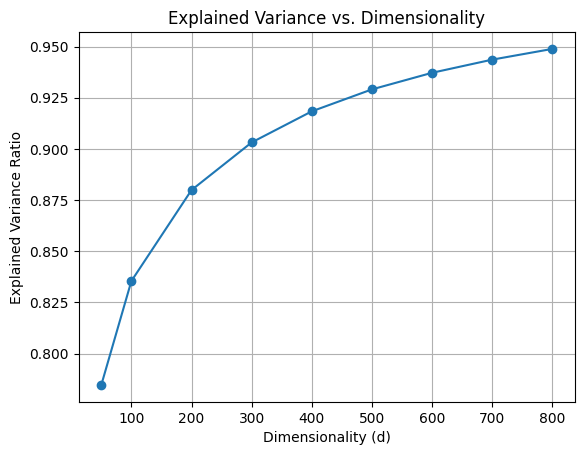

In [ ]:
plt.plot(d_values, explained_variances, marker='o')
plt.xlabel('Dimensionality (d)')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance vs. Dimensionality')
plt.grid(True)
plt.show()

In [ ]:
pickle.dump(embeddings, open("..\embeddings\embeddings.pkl", "wb"))

In [ ]:
pickle.dump(explained_variances, open("..\embeddings\explained_variances.pkl", "wb"))

In [ ]:
pickle.dump(embeddings[200], open("..\embeddings\embeddings_200.pkl", "wb"))
pickle.dump(embeddings[50], open("..\embeddings\embeddings_50.pkl", "wb"))

In [ ]:
word_to_index = pickle.load(open("../word2index.pkl", "rb"))

In [ ]:
embeddings = pickle.load(open("../embeddings/embeddings.pkl", 'rb'))

In [14]:
man = word_to_index['man']
woman = word_to_index['woman']
king = word_to_index['king']
queen = word_to_index['queen']

def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

similarities = []
similarities.append(cosine_similarity(embeddings[50][queen], embeddings[50][king] - embeddings[50][man] + embeddings[50][woman]))
similarities.append(cosine_similarity(embeddings[100][queen], embeddings[100][king] - embeddings[100][man] + embeddings[100][woman]))
similarities.append(cosine_similarity(embeddings[200][queen], embeddings[200][king] - embeddings[200][man] + embeddings[200][woman]))
similarities.append(cosine_similarity(embeddings[300][queen], embeddings[300][king] - embeddings[300][man] + embeddings[300][woman]))
similarities.append(cosine_similarity(embeddings[400][queen], embeddings[400][king] - embeddings[400][man] + embeddings[400][woman]))
similarities.append(cosine_similarity(embeddings[500][queen], embeddings[500][king] - embeddings[500][man] + embeddings[500][woman]))
similarities.append(cosine_similarity(embeddings[600][queen], embeddings[600][king] - embeddings[600][man] + embeddings[600][woman]))
similarities.append(cosine_similarity(embeddings[700][queen], embeddings[700][king] - embeddings[700][man] + embeddings[700][woman]))
similarities.append(cosine_similarity(embeddings[800][queen], embeddings[800][king] - embeddings[800][man] + embeddings[800][woman]))



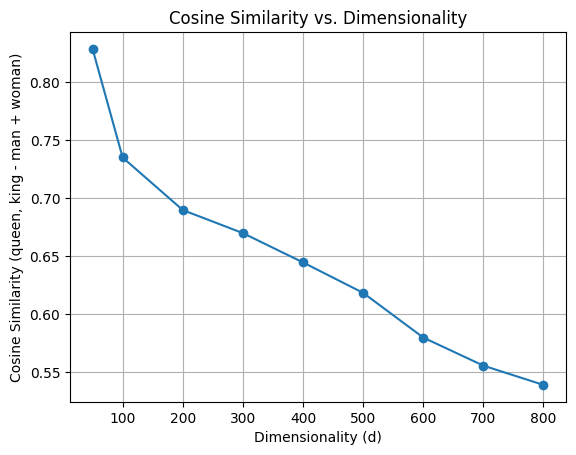

: 

In [ ]:
d_values = [50, 100, 200, 300, 400, 500, 600, 700, 800] 
plt.plot(d_values, similarities, marker='o')
plt.xlabel('Dimensionality (d)')
plt.ylabel('Cosine Similarity (queen, king - man + woman)')
plt.title('Cosine Similarity vs. Dimensionality')
plt.grid(True)
plt.show()

In [12]:
man = word_to_index['man']
woman = word_to_index['woman']
boy = word_to_index['boy']
girl = word_to_index['girl']

def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

similarities = []
similarities.append(cosine_similarity(embeddings[50][woman], embeddings[50][man] - embeddings[50][boy] + embeddings[50][girl]))
similarities.append(cosine_similarity(embeddings[100][woman], embeddings[100][man] - embeddings[100][boy] + embeddings[100][girl]))
similarities.append(cosine_similarity(embeddings[200][woman], embeddings[200][man] - embeddings[200][boy] + embeddings[200][girl]))
similarities.append(cosine_similarity(embeddings[300][woman], embeddings[300][man] - embeddings[300][boy] + embeddings[300][girl]))
similarities.append(cosine_similarity(embeddings[400][woman], embeddings[400][man] - embeddings[400][boy] + embeddings[400][girl]))
similarities.append(cosine_similarity(embeddings[500][woman], embeddings[500][man] - embeddings[500][boy] + embeddings[500][girl]))
similarities.append(cosine_similarity(embeddings[600][woman], embeddings[600][man] - embeddings[600][boy] + embeddings[600][girl]))
similarities.append(cosine_similarity(embeddings[700][woman], embeddings[700][man] - embeddings[700][boy] + embeddings[700][girl]))
similarities.append(cosine_similarity(embeddings[800][woman], embeddings[800][man] - embeddings[800][boy] + embeddings[800][girl]))

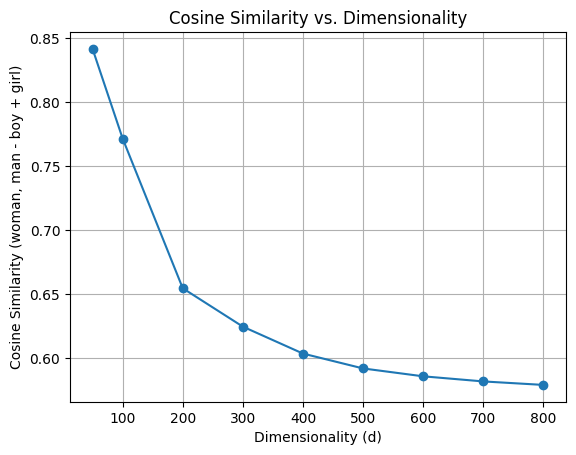

In [13]:
d_values = [50, 100, 200, 300, 400, 500, 600, 700, 800] 
plt.plot(d_values, similarities, marker='o')
plt.xlabel('Dimensionality (d)')
plt.ylabel('Cosine Similarity (woman, man - boy + girl)')
plt.title('Cosine Similarity vs. Dimensionality')
plt.grid(True)
plt.show()